In [111]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

<span style='font-size:25px'>Load the Dataset</span>

In [112]:
df= pd.read_csv(r'C:\Users\surya\Downloads\archive\startup_funding.csv')
df_copy=df.copy()

In [113]:
#Number of missing values in each column
missing_values=df.isnull().sum()
print(missing_values)

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


 <span style="font-size: 25px;">Cleaning the Dataset</span>

In [114]:
#Cleaning the Dataset
df.columns.str.strip()

# Convert 'Amount in USD' column to string first
df['Amount in USD'] = df['Amount in USD'].astype(str)

#1 Convert date into correct format and remove missing values
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], format='%d/%m/%Y', errors='coerce')
df.dropna(subset=['Date dd/mm/yyyy'],inplace=True)

#2 Convert Amount in USD without the commas
df['Amount in USD']=df['Amount in USD'].str.replace(',','',regex=True)

#3 Handle the missing values
for col in ['Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType']:
    mode=df[col].mode()
    if not mode.empty:
        df.loc[:, col] = df[col].fillna(mode[0])

#4 Remove the Remarks column as it has too many NaN values
df=df.drop('Remarks',axis=1)

#5 Remove the dataset where the startup name and Amount in USD is still Nan
df.dropna(subset=['Startup Name', 'Amount in USD'],inplace=True)

#Renaming the names
df['City  Location'] = df['City  Location'].replace({'Bengaluru': 'Bangalore'})
df['Investors Name'] = df['Investors Name'].replace({'Softbank': 'SoftBank Group'})

In [115]:
print(df.isnull().sum())

Sr No                0
Date dd/mm/yyyy      0
Startup Name         0
Industry Vertical    0
SubVertical          0
City  Location       0
Investors Name       0
InvestmentnType      0
Amount in USD        0
dtype: int64


In [116]:
# Apply numeric conversion only to 'Amount in USD'
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# Drop rows with NaN in 'Amount in USD'
df_cleaned = df.dropna(subset=['Amount in USD'])

<span style=font-size:25px>Insights and visualizations from the Dataset</span>

The total invested amount across all the startups are 38047507864.22
The average investment of all startups are 18478634.222544927


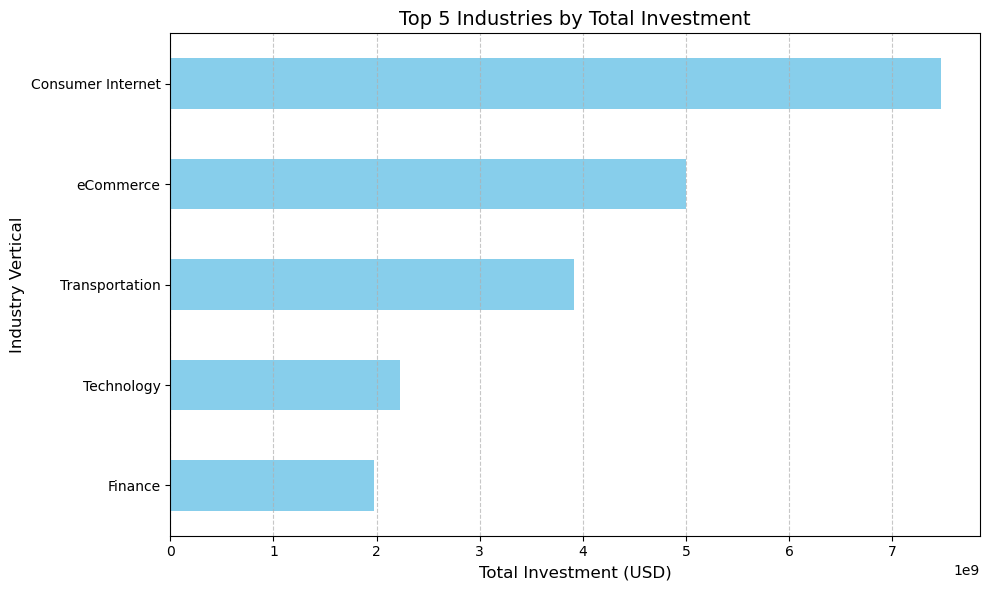

In [117]:
# 1 

#Total investment amount
total_investment = df['Amount in USD'].sum()

# Average investment amount
average_investment = df['Amount in USD'].mean()

print('The total invested amount across all the startups are',total_investment)

print('The average investment of all startups are',average_investment)

# Visualization: Top 5 Industries by Investment
plt.figure(figsize=(10, 6))
top_industries.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 5 Industries by Total Investment", fontsize=14)
plt.xlabel("Total Investment (USD)", fontsize=12)
plt.ylabel("Industry Vertical", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [118]:
# 2. Top 5 industries by total investment
top_industries = (
    df.groupby('Industry Vertical')['Amount in USD']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print('The top 5 industries are ', top_industries)

The top 5 industries are  Industry Vertical
Consumer Internet    7.477796e+09
eCommerce            5.002533e+09
Transportation       3.916632e+09
Technology           2.229708e+09
Finance              1.971438e+09
Name: Amount in USD, dtype: float64


The top 5 cities by total investment are City  Location
Bangalore    1.973118e+10
Mumbai       4.911805e+09
New Delhi    3.017817e+09
Gurgaon      3.005296e+09
Noida        1.262864e+09
Name: Amount in USD, dtype: float64


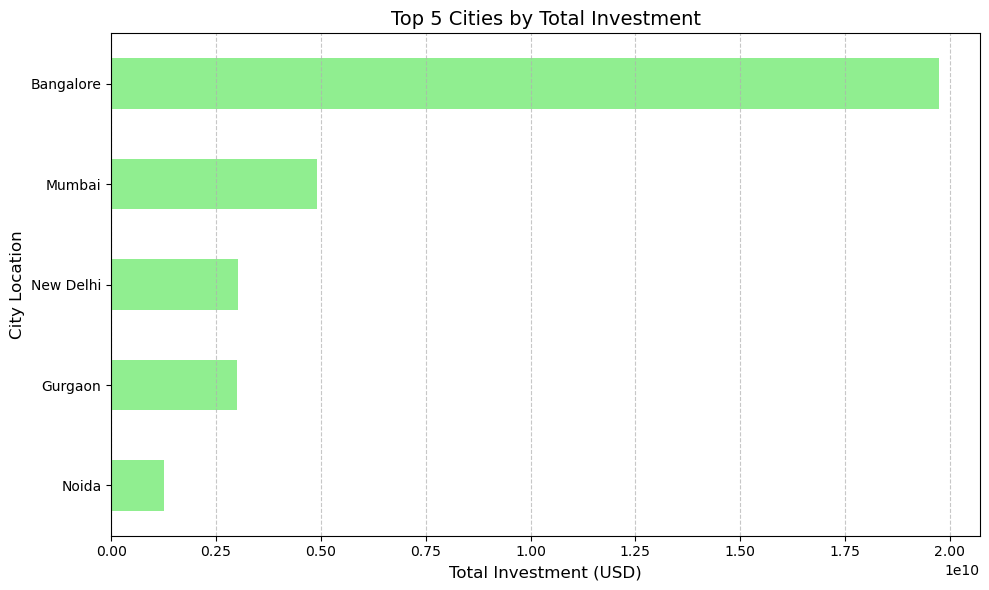

In [119]:
# 3. Top 5 cities by total investment
top_cities = (
    df.groupby('City  Location')['Amount in USD']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print('The top 5 cities by total investment are', top_cities)

# Visualization: Top 5 Cities by Investment
plt.figure(figsize=(10, 6))
top_cities.sort_values().plot(kind='barh', color='lightgreen')
plt.title("Top 5 Cities by Total Investment", fontsize=14)
plt.xlabel("Total Investment (USD)", fontsize=12)
plt.ylabel("City Location", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Top 5 startups by total funding Startup Name
Flipkart            4.059700e+09
Rapido Bike Taxi    3.900000e+09
Paytm               3.148950e+09
Ola                 9.845000e+08
Udaan               8.700000e+08
Name: Amount in USD, dtype: float64


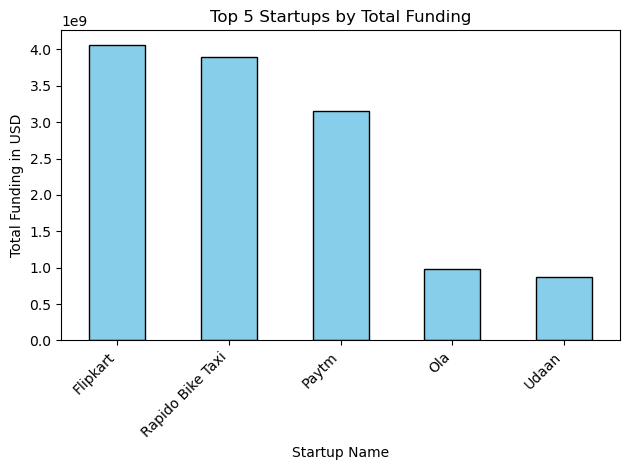

In [120]:
# 4. Top 5 startups by total funding
top_startups = (
    df.groupby('Startup Name')['Amount in USD']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print('Top 5 startups by total funding', top_startups)

# Plotting the top 5 startups by total funding
top_startups.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Top 5 Startups by Total Funding')
plt.xlabel('Startup Name')
plt.ylabel('Total Funding in USD')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [128]:
# 5. Yearly funding trends
df['Year'] = df['Date dd/mm/yyyy'].dt.year
yearly_trends = (
    df.groupby('Year')['Amount in USD']
    .sum()
    .sort_values(ascending=False)
)
print('Yearly funding trends',yearly_trends)


Yearly funding trends Year
2017    1.042931e+10
2019    9.686577e+09
2015    8.597207e+09
2018    5.116118e+09
2016    3.828089e+09
2020    3.902073e+08
Name: Amount in USD, dtype: float64


In [122]:
df.isnull().sum()

Sr No                  0
Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical      0
SubVertical            0
City  Location         0
Investors Name         0
InvestmentnType        0
Amount in USD        977
Year                   0
dtype: int64

In [127]:
#Top 5 Investment Groups
top_investors = (
    df.groupby('Investors Name')['Amount in USD']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print('The top 5 Investors are ', top_investors)


The top 5 Investors are  Investors Name
SoftBank Group                              3.962000e+09
Westbridge Capital                          3.900000e+09
Microsoft, eBay, Tencent Holdings           1.400000e+09
Vijay Shekhar Sharma                        1.000150e+09
Steadview Capital and existing investors    7.000000e+08
Name: Amount in USD, dtype: float64
